<Figure size 720x288 with 0 Axes>

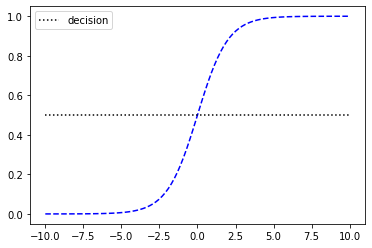

<Figure size 720x288 with 0 Axes>

In [1]:
# 남은 4장 정리

# 로지스틱회귀의 함수인 시그모이드 함수
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-X))
y_new = np.zeros(100,) + 0.5

plt.plot(X, y, "b--")
plt.plot(X, y_new, "k:", label="decision")
plt.legend()
plt.figure(figsize=(10, 4))

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [3]:
X = iris["data"][:, 3:] # 3열이 꽃잎의 너비임
y = (iris["target"] == 2).astype(np.int) 
# 0,1,2 중 2가 Iris-Verginica
# astype(np.int) -> True, False => 1, 0으로 변환

In [4]:
# 로지스틱 회귀로 훈련

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

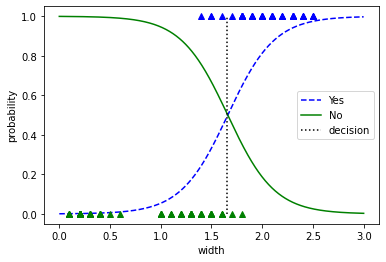

In [5]:
# 추정

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "b--", label="Yes")
plt.plot(X_new, y_proba[:, 0], "g-", label="No")
plt.legend()

index = 0
for i in range(0, len(y_proba)):
    if((y_proba[:, 0][i]) >= 0.5):
        index = i
        
X_decision = X_new[index]
X_decision = np.zeros(100,) + X_decision
y_decision = np.linspace(0, 1, 100)
plt.plot(X_decision, y_decision, "k:", label="decision")
plt.legend()
plt.xlabel("width")
plt.ylabel("probability")

y_iris, y_not_iris = [], []
for i in y:
    if i == 1 :
        y_iris.append(1)
    if i == 0 :
        y_not_iris.append(0)
y_iris = np.array(y_iris).reshape(-1, 1)
y_not_iris = np.array(y_not_iris).reshape(-1, 1)
X_not_iris = X[:100]
X_iris = X[100:]

plt.plot(X_iris, y_iris, "b^")
plt.plot(X_not_iris, y_not_iris, "g^")

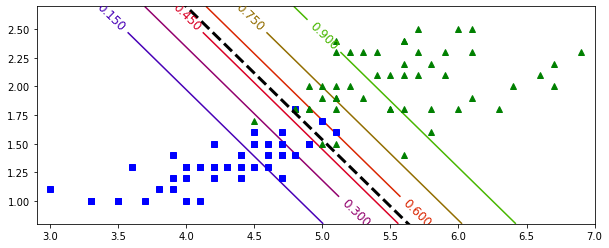

In [6]:
# 그래프 확률 그리기


# 데이터 정제
X = iris["data"][:, (2, 3)] # 너비와 길이
y = (iris["target"] == 2).astype(np.int) 


# 훈련
log_reg = LogisticRegression()
log_reg.fit(X, y)


# 가로, 세로 모든점에 대한 확률
x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()] # ravel -> 다차원을 평형하게
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs") # Iris에 해당하는 꽃잎 길이와 너비
plt.plot(X[y==1, 0],X[y==1, 1], "g^") # Iris에 해당하지 않는 꽃잎 길이와 너비
plt.axis([2.9, 7, 0.8, 2.7])


# 색깔선 그리기
# 15~90%의 확률로 꽃 구별
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap = plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

# 경계선 그리기
# 50%의 확률로 꽃 구별
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)

In [7]:
# 소프트맥스 함수를 활용한 다중 분류

X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [8]:
# 길이 5, 너비 2인 꽃 판단
softmax_reg.predict([[5, 2]])

array([2])

In [9]:
softmax_reg.predict_proba([[5, 2]])
# 차례대로 확률 94의 확률로 iris-versicolor로 예측

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

<a list of 6 text.Text objects>

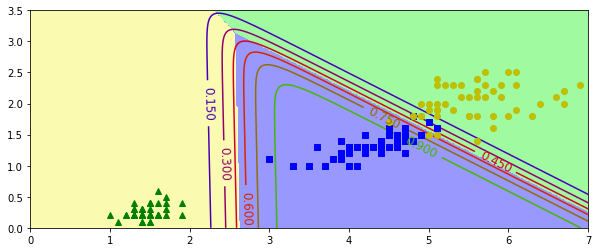

In [10]:
# 그래프로 판단
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "g^") # 라벨 0
plt.plot(X[y==1, 0],X[y==1, 1], "bs") # 라벨 1
plt.plot(X[y==2, 0],X[y==2, 1], "yo") # 라벨 2
plt.axis([0, 7, 0, 3.5])


# 모든 점에 대한 예측
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()] # ravel -> 다차원을 평형하게

y_proba = softmax_reg.predict_proba(X_new) # 각 라벨에 대한 확률
y_predict = softmax_reg.predict(X_new) # 예측 라벨


zz1 = y_proba[:, 1].reshape(x0.shape) # 기준 선을 위한 데이터
zz = y_predict.reshape(x0.shape) # 채색을 위한 데이터


# 색 채우기
from matplotlib.colors import ListedColormap
custom_map = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
plt.contourf(x0, x1, zz, cmap=custom_map)


# 그래프 그리기
contour = plt.contour(x0, x1, zz1, cmap = plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

In [11]:
# 5장 정리

# 선형 SVM 분류
# 소프트 마진 분류 -> 도로 폭이 넓은것으로 오류가 많지만 일반화가 잘됨
# 하드 마진 분류 -> 도로 폭이 좁은것으로 이상치에 민감하고 일반화가 잘 안됨
# C가 클수록 도로폭이 좁다


# 선형 SVM 구현 1
# 1~3 동일한 모델
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [12]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [13]:
# 선형 SVM 구현 2
from sklearn.svm import SVC

svc_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel = "linear", C=1)),
])

svc_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=1, kernel='linear'))])

In [14]:
svc_clf.predict([[5.5, 1.7]])

array([1.])

In [15]:
# 선형 SVM 구현 3
from sklearn.linear_model import SGDClassifier

m = len(X)
C = 1
sgd_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd_clf", SGDClassifier(loss="hinge", alpha=1/(m*C))),
])

sgd_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd_clf', SGDClassifier(alpha=0.006666666666666667))])

In [16]:
sgd_clf.predict([[5.5, 1.7]])

array([1.])

In [17]:
# 비선형 SVM 분류
# 선형 즉, 직선으로 분류가 어려울때 특성을 추가하여 분류 (4장의 polynomial)

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15) # 데이터 만들기
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)), # 특성 추가
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge")),
])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

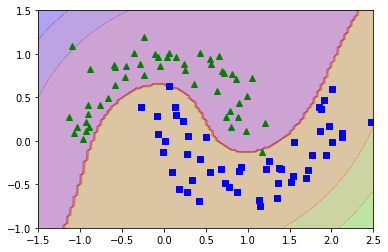

In [18]:
# 그래프 표현

def plot_predictions(clf, axes):
    # X - 입력받은 범위의 모든 점이라고 생각하면 됨
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    
    y_pred = clf.predict(X).reshape(x0.shape) # 예측 라벨
    y_decision = clf.decision_function(X).reshape(x0.shape) # 결정함수
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2) # 라벨에 따른 등고선
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.2) # 결정함수에 따른 등고선

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.plot(X[y==0, 0], X[y==0, 1], "g^") 
plt.plot(X[y==1, 0],X[y==1, 1], "bs")

In [19]:
# 특성 추가
# 1. 다항식 커널
# 차수가 적으면 복잡한 데이터에 반응 못하고 차수가 많으면 시간이 오래걸림
# 이를 해결하는 것으로, 실제로는 특성을 추가하지 않지만 다항식 특성을 추가한 것과 같은 결과를 도출

from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
# coef0 -> 모델이 높은 착수와 낮은 차수에 얼마나 영향을 받을지 조절
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

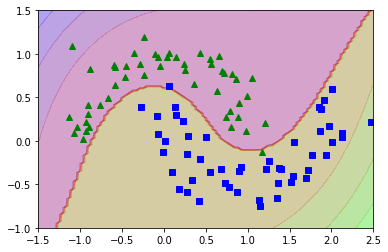

In [20]:
# degree = 3, coef0 = 1, C = 5
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.plot(X[y==0, 0], X[y==0, 1], "g^") 
plt.plot(X[y==1, 0],X[y==1, 1], "bs")

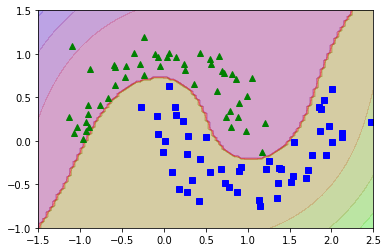

In [21]:
# degree = 10, coef0 = 100, C = 5

poly_kernel_svm_clf_second = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
poly_kernel_svm_clf_second.fit(X, y)


plot_predictions(poly_kernel_svm_clf_second, [-1.5, 2.5, -1, 1.5])
plt.plot(X[y==0, 0], X[y==0, 1], "g^") 
plt.plot(X[y==1, 0],X[y==1, 1], "bs")

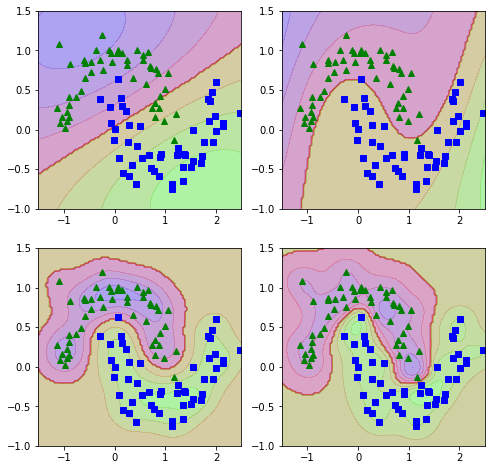

In [29]:
# 2. 가우시안 커널
# 유사도 특성을 활용
# 기준(랜드마크)와의 간격을 활용
# 감마가 규제 역할

def make_gousian(gamma, C):
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    plt.plot(X[y==0, 0], X[y==0, 1], "g^")
    plt.plot(X[y==1, 0], X[y==1, 1], "bs")
    plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])

plt.figure(figsize = (8,8))
plt.subplot(221);
make_gousian(0.1, 0.001)
plt.subplot(222);
make_gousian(0.1, 1000)
plt.subplot(223);
make_gousian(5, 0.001)
plt.subplot(224);
make_gousian(5, 1000)
plt.show()

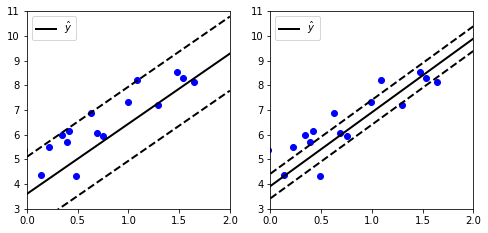

In [52]:
# 선형 SVM 회귀
# 입실론의 크기로 도로폭 결정

# 데이터
np.random.seed(42)
m = 50
X = 2*np.random.randn(m ,1)
y = (4 + 3 * X + np.random.randn(m ,1)).ravel()

def plot_svm_regression(svm_reg, X, y, axes):
    xls = np.linspace(axes[0], axes[1], 100).reshape(100, 1) # 0부터 2까지의 데이터
    y_pred = svm_reg.predict(xls) # 위에서 만든 0부터 2까지의 데이터에 대한 예측
    
    
    
    
    plt.plot(X ,y, "bo")
    plt.plot(xls, y_pred, "k-", linewidth=2, label=r"$\hat{y}$") # 예측 경계선 표시
    plt.plot(xls, y_pred + svm_reg.epsilon, "k--", linewidth=2) # 위쪽 도로 경계선
    plt.plot(xls, y_pred - svm_reg.epsilon, "k--", linewidth=2) # 아래쪽 도로 경계선
    plt.axis([0, 2, 3, 11])
    plt.legend()


from sklearn.svm import LinearSVR
svm_reg1 = LinearSVR(epsilon=1.5)
svm_reg1.fit(X, y)
svm_reg2 = LinearSVR(epsilon=0.5)
svm_reg2.fit(X, y)


plt.figure(figsize=(8,8))
plt.subplot(221);
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.subplot(222);
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])

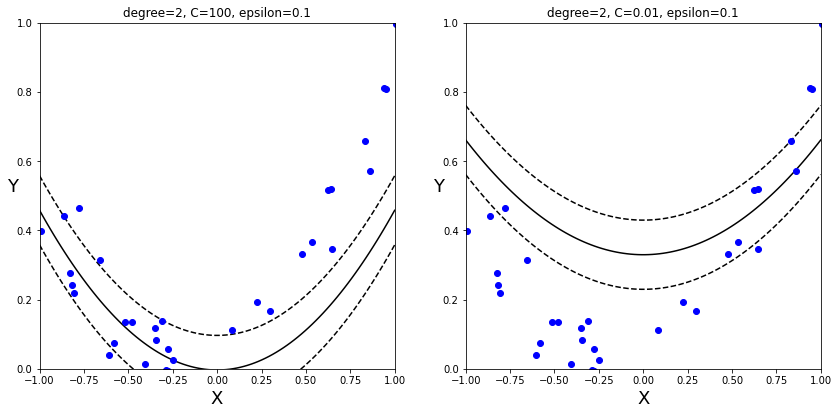

In [80]:
# 비선형 SVM 회귀
# C는 규제를 의미

from sklearn.svm import SVR

np.random.seed(42)
m = 100
X = 2*np.random.randn(m ,1) - 1
y = (0.1 + 0.5*X**2 + 0.2*X + np.random.randn(m ,1)/10).ravel()

def draw_graph_svr(degree, C, epsilon):
    svm_poly_reg = SVR(kernel="poly", degree=degree, C=C, epsilon=epsilon)
    svm_poly_reg.fit(X, y)
    
    xls = np.linspace(-1, 1, 100).reshape(100, 1)
    y_pred = svm_poly_reg.predict(xls)
    plt.plot(xls, y_pred, "k-")
    plt.plot(xls, y_pred + svm_poly_reg.epsilon, "k--")
    plt.plot(xls, y_pred - svm_poly_reg.epsilon, "k--")
    plt.axis([-1, 1, 0, 1])
    plt.title(r"degree={}, C={}, epsilon={}".format(degree, C, epsilon))
    plt.xlabel("X", rotation=0, fontsize=18)
    plt.ylabel("Y", rotation=0, fontsize=18)
    plt.plot(X, y, "bo")

    
plt.figure(figsize=(14, 14))
plt.subplot(221);
draw_graph_svr(2, 100, 0.1)
plt.subplot(222);
draw_graph_svr(2, 0.01, 0.1)